In [28]:
import networkx as nx
import osmnx
import time
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import graph_tool as gt
import graph_tool.draw as gtd
from tqdm import tqdm

In [29]:
#get communes names and department names
with open('/Users/endingalaporte/Desktop/planning/W23_0207-0907_CLUSTERING/communes.txt'
          , 'r') as f:
    names = [line.strip() for line in f]
with open('/Users/endingalaporte/Desktop/planning/W23_0207-0907_CLUSTERING/départements.txt', 'r') as f:
    departments = [line.strip() for line in f]
    
#plot communes and departments
n = len(names)
for i in range(n):
    print([names[i] +', '+ departments[i]])

['Ajaccio, Corse-du-Sud']
['Bastia, Haute-Corse']
['Bourg-en-Bresse, Ain']
['Laon, Aisne']
['Moulins, Allier']
['Digne-les-Bains, Alpes-de-Haute-Provence']
['Gap, Hautes-Alpes']
['Nice, Alpes-Maritimes']
['Privas, Ardèche']
['Charleville-Mézières, Ardennes']
['Foix, Ariège']
['Troyes, Aube']
['Carcassonne, Aude']
['Rodez, Aveyron']
['Marseille, Bouches-du-Rhône']
['Caen, Calvados']
['Aurillac, Cantal']
['Angoulême, Charente']
['La Rochelle, Charente-Maritime']
['Bourges, Cher']
['Tulle, Corrèze']
["Dijon, Côte-d'Or"]
["Saint-Brieuc, Côtes-d'Armor"]
['Guéret, Creuse']
['Périgueux, Dordogne']
['Besançon, Doubs']
['Valence, Drôme']
['Évreux, Eure']
['Chartres, Eure-et-Loir']
['Quimper, Finistère']
['Nîmes, Gard']
['Toulouse, Haute-Garonne']
['Auch, Gers']
['Bordeaux, Gironde']
['Montpellier, Hérault']
['Rennes, Ille-et-Vilaine']
['Châteauroux, Indre']
['Tours, Indre-et-Loire']
['Grenoble, Isère']
['Lons-le-Saunier, Jura']
['Mont-de-Marsan, Landes']
['Blois, Loir-et-Cher']
['Saint-Étienne,

In [30]:
names[-7:] #these are not from metropolitan france so we omit adding France while querrying from osm

['Basse-Terre',
 'Fort-de-France',
 'Cayenne',
 'Saint-Denis',
 'Mamoudzou',
 'Papeete',
 'Nouméa']

In [27]:
len(data)

101

In [33]:
s = time.time()

n = len(names)


last = max([0,1,2,3,4,5,6,7,8, 100])+1 #last city that was extracted just before code broke

#data = []
for i in tqdm(range(last,n)): 
    #search city graph
    if names[i] in names[-7:]:
        city_name = names[i] + ', ' + departments[i]
    if names[i] not in names[-7:]:
        city_name = names[i] + ', ' + departments[i] +', France'
    G = osmnx.graph_from_place(city_name, network_type='all')
    G = nx.Graph(G)
    G = nx.relabel.convert_node_labels_to_integers(G)
    data.append(G)
    
    #store edgelist txt
    o_f = '/Users/endingalaporte/Desktop/planning/W23_0207-0907_CLUSTERING/osmnx_cites'
    file = "/edgelist_city"+str(i)+".txt"
    output_path = o_f + file
    nx.write_edgelist(data[i], output_path, data = False)
    print(i,"-th graph of size ",len(data[i]),"duration of",int(time.time()-s),"s")

 50%|█████     | 1/2 [00:34<00:34, 34.89s/it]

101 -th graph of size  2874 duration of 34 s


100%|██████████| 2/2 [01:45<00:00, 52.54s/it]

102 -th graph of size  14035 duration of 105 s


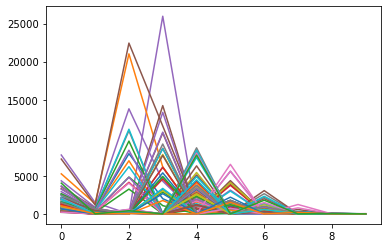

In [36]:
#degree histogram for each graph
for i in range(n):
    degree_sequence = sorted([d for n, d in nx.Graph(data[i]).degree()], reverse=True)  # degree sequence
    a = np.histogram(degree_sequence)[0]
    plt.plot(a)

#open edgelist from txt and plot it in graph_tool

def string_to_list(string):
    """given a string of two elements, returns each element in a list"""
    return [int(string.split(' ')[0]), int(string.split(' ')[1])]

In [37]:
G_list = []
for i in range(n):
    open_path = o_f + "/edgelist_city"+str(i)+".txt"
    print(open_path)
    text = open(open_path, 'r')
    reader = csv.reader(text, delimiter='\n')
    elist = [string_to_list(row[0]) for row in reader]
    G = gt.Graph(directed = False)
    G.add_edge_list(elist)
    G_list.append(G)
    #gtd.graph_draw(G, output_size = (300,300))

/Users/endingalaporte/Desktop/planning/W23_0207-0907_CLUSTERING/osmnx_cites/edgelist_city0.txt
/Users/endingalaporte/Desktop/planning/W23_0207-0907_CLUSTERING/osmnx_cites/edgelist_city1.txt
/Users/endingalaporte/Desktop/planning/W23_0207-0907_CLUSTERING/osmnx_cites/edgelist_city2.txt
/Users/endingalaporte/Desktop/planning/W23_0207-0907_CLUSTERING/osmnx_cites/edgelist_city3.txt
/Users/endingalaporte/Desktop/planning/W23_0207-0907_CLUSTERING/osmnx_cites/edgelist_city4.txt
/Users/endingalaporte/Desktop/planning/W23_0207-0907_CLUSTERING/osmnx_cites/edgelist_city5.txt
/Users/endingalaporte/Desktop/planning/W23_0207-0907_CLUSTERING/osmnx_cites/edgelist_city6.txt
/Users/endingalaporte/Desktop/planning/W23_0207-0907_CLUSTERING/osmnx_cites/edgelist_city7.txt
/Users/endingalaporte/Desktop/planning/W23_0207-0907_CLUSTERING/osmnx_cites/edgelist_city8.txt
/Users/endingalaporte/Desktop/planning/W23_0207-0907_CLUSTERING/osmnx_cites/edgelist_city9.txt
/Users/endingalaporte/Desktop/planning/W23_0207-09

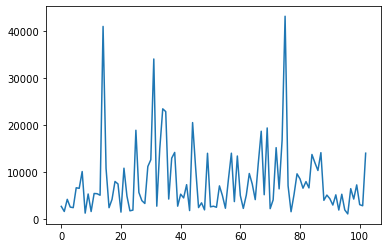

In [40]:
v = []
for g in G_list:
    v.append(len(tuple(g.vertices())))
v = np.array(v)